[View in Colaboratory](https://colab.research.google.com/github/HUSTneeb/GoogleColabCode/blob/master/TensorFlowLearning8.ipynb)

In [1]:
import tensorflow as tf
tfe=tf.contrib.eager
tf.enable_eager_execution()

x=tf.zeros([10,10])
x+=2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [0]:
v=tfe.Variable(1.0)
assert v.numpy()==1.0

v.assign(3.0)
assert v.numpy()==3.0

v.assign(tf.square(v))
assert v.numpy()==9.0

In [0]:
class Model():
  def __init__(self):
    self.W=tfe.Variable(5.0)
    self.b=tfe.Variable(0.0)
    
  def __call__(self,x):
    return self.W*x+self.b
  
model=Model()
assert model(3.0).numpy()==15.0

In [0]:
def loss_function(predicted_y,desired_y):
  return tf.reduce_mean(tf.square(predicted_y-desired_y))

In [0]:
TRUE_W=3.0
TRUE_b=2.0
NUM_EXAMPLES=1000

inputs=tf.random_normal(shape=[NUM_EXAMPLES])
noise=tf.random_normal(shape=[NUM_EXAMPLES])
outputs=inputs*TRUE_W +TRUE_b+noise


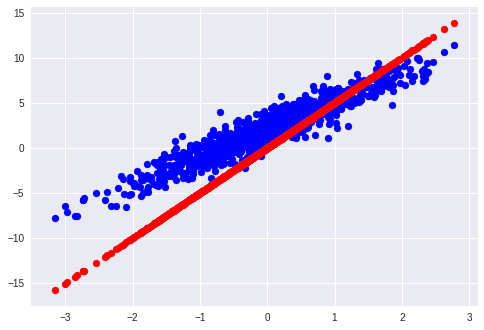

Current loss: 
8.921101


In [9]:
import matplotlib.pyplot as plt

plt.scatter(inputs,outputs,c='b')
plt.scatter(inputs,model(inputs),c='r')
plt.show()

print('Current loss: ')
print(loss_function(model(inputs),outputs).numpy())

In [0]:
def train(model,inputs,outputs,learning_rate):
  with tf.GradientTape() as t:
    current_loss=loss_function(model(inputs),outputs)
  dW,db=t.gradient(current_loss,[model.W,model.b])
  model.W.assign_sub(learning_rate*dW)
  model.b.assign_sub(learning_rate*db)

Epoch  0: W=5.00,b=0.00,loss=8.92110
Epoch  1: W=4.62,b=0.41,loss=6.07982
Epoch  2: W=4.31,b=0.74,loss=4.25959
Epoch  3: W=4.06,b=1.00,loss=3.09334
Epoch  4: W=3.86,b=1.20,loss=2.34601
Epoch  5: W=3.70,b=1.37,loss=1.86707
Epoch  6: W=3.57,b=1.50,loss=1.56009
Epoch  7: W=3.46,b=1.60,loss=1.36330
Epoch  8: W=3.38,b=1.69,loss=1.23713
Epoch  9: W=3.31,b=1.75,loss=1.15623


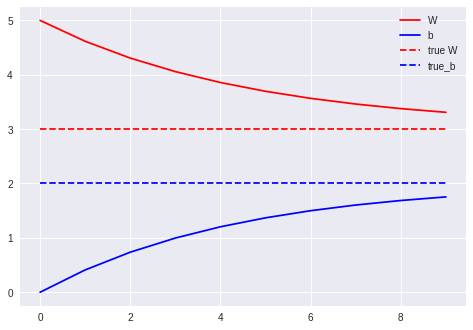

In [15]:
model=Model()

Ws,bs=[],[]
epochs=range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss=loss_function(model(inputs),outputs)
  
  train(model,inputs,outputs,learning_rate=0.1)
  print('Epoch %2d: W=%1.2f,b=%1.2f,loss=%2.5f'%
       (epoch,Ws[-1],bs[-1],current_loss))
  
plt.plot(epochs,Ws,'r',
        epochs,bs,'b')

plt.plot([TRUE_W]*len(epochs),'r--',
         [TRUE_b]*len(epochs),'b--')
plt.legend(['W','b','true W','true_b'])
plt.show()